___
# <center> CLASIFICACIÓN USANDO CARACTERÍSTICAS MÁS IMPORTANTES </center>
___

Importamos los DF que contengan los valores de cada sujeto en columnas y etiqueta en la columna 'Label'.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df_feat_anova01 = pd.read_csv('databases/df_feat_anova01_boxplot.csv')
df_feat_anova01 = df_feat_anova01.iloc[:,1:]
df_feat_anova01

,Roundness_42 Right_Cerebral_Cortex,Roundness_3 Left_Cerebral_Cortex,Feret diameter mm [mm]_16 Brain_Stem,Normalized Volume_42 Right_Cerebral_Cortex,md_52 Right_Pallidum,Feret diameter mm [mm]_11 Left_Caudate,Label
0,0.120375,0.119190,67.5056,0.235097,0.774522,50.8527,Control OS
1,0.125000,0.125871,61.4980,0.245987,0.785231,49.4267,Control OS
2,0.121043,0.123022,62.2415,0.227591,0.718182,52.4404,Control OS
3,0.123196,0.123538,64.9076,0.236720,0.775608,53.7959,Control OS
4,0.123771,0.118318,62.3137,0.234050,0.728175,51.7397,Control OS
5,0.116562,0.117203,62.4980,0.232550,0.751795,55.5518,Control OS
6,0.125370,0.122352,58.1893,0.241357,0.753597,45.8694,Desnutrición OS
7,0.131734,0.130587,60.1997,0.257331,0.707369,48.9592,Desnutrición OS
8,0.126849,0.126993,57.8965,0.245801,0.673871,48.0208,Desnutrición OS
9,0.130826,0.134376,57.4369,0.246229,0.676277,46.1844,Desnutrición OS


In [2]:
validation_set_label_anova01 = df_feat_anova01[12:]
validation_set_label_anova01['Label'] = [0,0,1,1]
validation_set_label_anova01

,Roundness_42 Right_Cerebral_Cortex,Roundness_3 Left_Cerebral_Cortex,Feret diameter mm [mm]_16 Brain_Stem,Normalized Volume_42 Right_Cerebral_Cortex,md_52 Right_Pallidum,Feret diameter mm [mm]_11 Left_Caudate,Label
12,0.123361,0.119025,57.4891,0.246693,0.663191,54.8726,0
13,0.122443,0.123270,59.2115,0.231290,0.772928,49.9099,0
14,0.126497,0.123844,59.5567,0.248394,0.732118,48.4768,1
15,0.134034,0.134489,57.0438,0.238927,0.720520,51.7977,1


In [3]:
import functions_dataframe
import functions_stats
import functions_ML
import importlib # Por si necesitamos actualizar los archivos .py

def import_reload():
    importlib.reload(functions_dataframe)
    importlib.reload(functions_stats)
    importlib.reload(functions_ML)

In [4]:
import_reload()
from functions_dataframe import X_y,X_y_X_names

help(X_y_X_names)

Help on function X_y_X_names in module functions_dataframe:

X_y_X_names(df_feat, labels, dimensiones)
    Función para separar data, etiquetas y nombres.
    :param df_feat:
    :param labels:
    :param dimensiones:
    :return:



___
# 2 PRIMERAS CARACTERÍSTICAS

In [5]:
import_reload()
from functions_ML import svm_2d

help(svm_2d)

Help on function svm_2d in module functions_ML:

svm_2d(X, y, X_names, alg_name)
    Función para plotear los márgenes de los vectores soportes y su hiperplano separador.
    :param X: Array con data 2D sin etiquetas.
    :param y: Array de las etiquetas.
    :param X_names: Lista de nombres de las características
    :param alg_name: Nombre del algoritmo.
    :return:



### ANOVA

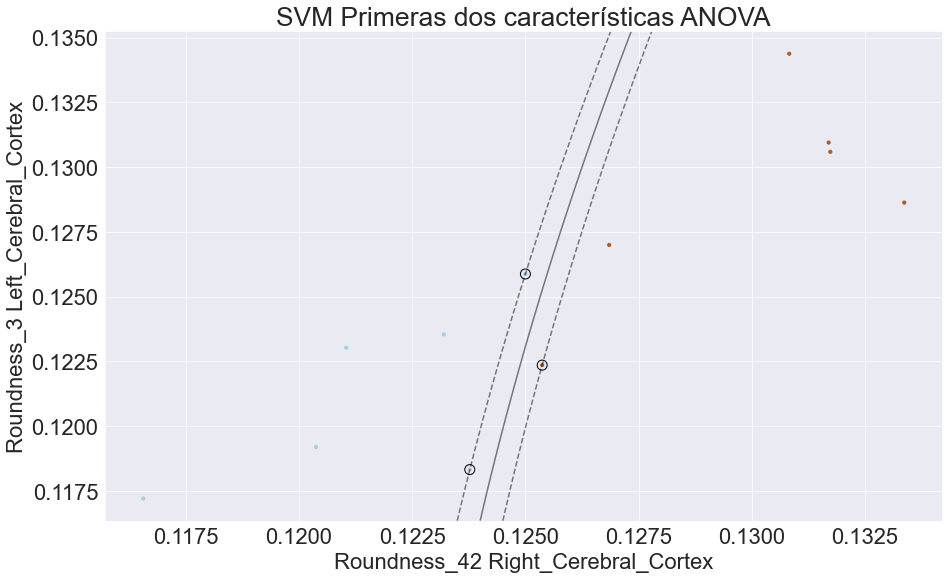

In [6]:
labels_training = [0,0,0,0,0,0,1,1,1,1,1,1]
X,y,X_names = X_y_X_names(df_feat_anova01, labels_training, 2)
svm_2d(X,y,X_names,'ANOVA')

Desempeño con el test de validación.

In [7]:
from sklearn import svm

import_reload()
from functions_ML import svm_n_dimensiones

labels_validation = [0,0,1,1]
svm_n_dimensiones(df_feat_anova01,labels_training,validation_set_label_anova01, labels_validation, 2)

Accuracy: 1.0


1.0

### Información Mutua

In [8]:
df_feat_mi35 = pd.read_csv('databases/df_feat_mi35_boxplot.csv')
df_feat_mi35 = df_feat_mi35.iloc[:,1:]
df_feat_mi35

,Roundness_42 Right_Cerebral_Cortex,Normalized Volume_42 Right_Cerebral_Cortex,Feret diameter mm [mm]_16 Brain_Stem,Elongation_50 Right_Caudate,ad_16 Brain_Stem,Label
0,0.120375,0.235097,67.5056,2.43201,1.55269,Control OS
1,0.125000,0.245987,61.4980,2.63137,1.63735,Control OS
2,0.121043,0.227591,62.2415,2.54105,1.76960,Control OS
3,0.123196,0.236720,64.9076,2.49221,1.67031,Control OS
4,0.123771,0.234050,62.3137,2.58709,1.50869,Control OS
5,0.116562,0.232550,62.4980,2.52787,1.61595,Control OS
6,0.125370,0.241357,58.1893,2.32085,1.49533,Desnutrición OS
7,0.131734,0.257331,60.1997,2.26323,1.40668,Desnutrición OS
8,0.126849,0.245801,57.8965,2.35830,1.49766,Desnutrición OS
9,0.130826,0.246229,57.4369,2.20517,1.55164,Desnutrición OS


In [9]:
validation_set_label_mi35 = df_feat_mi35[12:]
validation_set_label_mi35['Label'] = [0,0,1,1]
validation_set_label_mi35

,Roundness_42 Right_Cerebral_Cortex,Normalized Volume_42 Right_Cerebral_Cortex,Feret diameter mm [mm]_16 Brain_Stem,Elongation_50 Right_Caudate,ad_16 Brain_Stem,Label
12,0.123361,0.246693,57.4891,2.31982,1.37619,0
13,0.122443,0.231290,59.2115,2.35886,1.55043,0
14,0.126497,0.248394,59.5567,2.59940,1.58510,1
15,0.134034,0.238927,57.0438,2.41689,1.52783,1


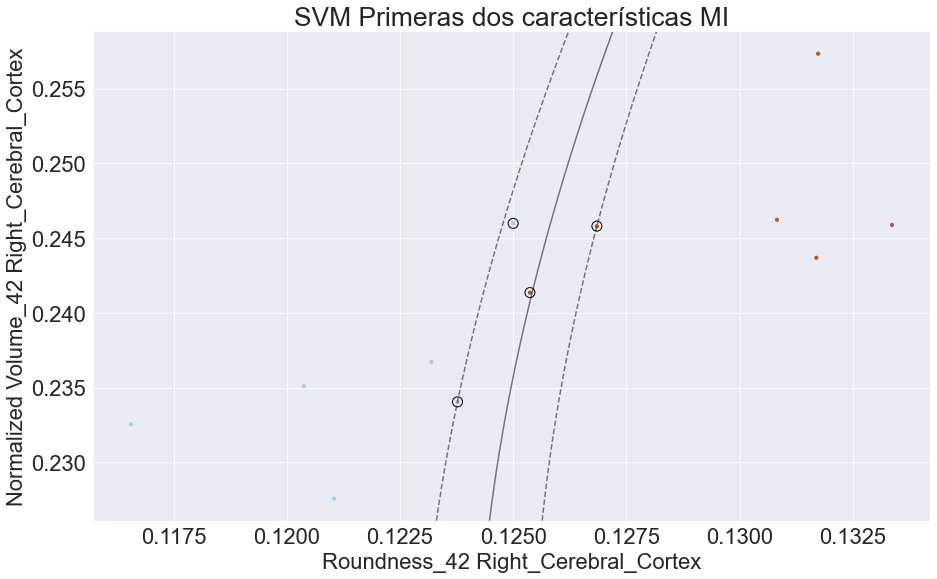

In [10]:
X,y,X_names = X_y_X_names(df_feat_mi35,labels_training, 2)

svm_2d(X,y,X_names,'MI')

Validación

In [11]:
svm_n_dimensiones(df_feat_mi35,labels_training,validation_set_label_mi35, labels_validation, 2)

Accuracy: 0.75


0.75

___
# 3 PRIMERAS CARACTERÍSTICAS


Importamos la función *svm_3d()* para observar las primeras 3 características.

In [12]:
import_reload()
from functions_ML import svm_3d

help(svm_3d)

Help on function svm_3d in module functions_ML:

svm_3d(X, y, X_names)
    Función para plotear 3 dimensiones o características.
    :param X: Array con data 2D sin etiquetas.
    :param y: Array de las etiquetas.
    :param X_names: Lista de nombres de las características.
    :return:



PRIMERAS 3 DE ANOVA

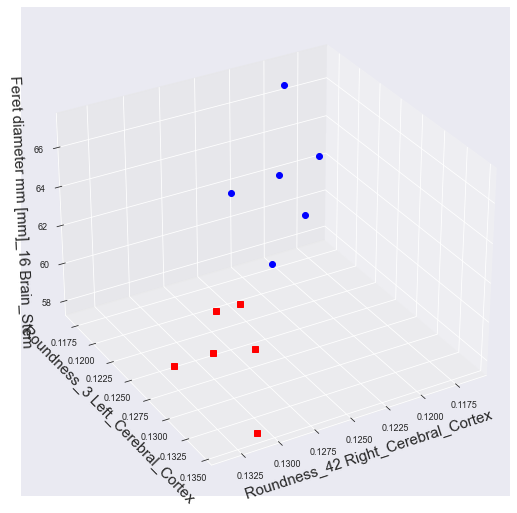

In [13]:
X,y,X_names = X_y_X_names(df_feat_anova01,labels_training, 3)
svm_3d(X,y,X_names)

Validación 3 dimensiones ANOVA


In [14]:
svm_n_dimensiones(df_feat_anova01,labels_training,validation_set_label_anova01, labels_validation, 3)

Accuracy: 0.5


0.5

PRIMERAS 3 DE INFORMACIÓN MUTUA

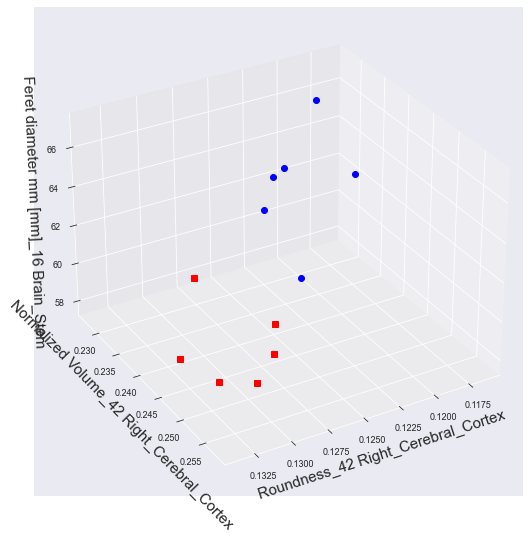

In [15]:
X,y,X_names = X_y_X_names(df_feat_mi35,labels_training, 3)
svm_3d(X,y,X_names)

In [16]:
svm_n_dimensiones(df_feat_mi35,labels_training,validation_set_label_mi35, labels_validation, 3)

Accuracy: 0.5


0.5

# Clasificación usando TODAS las características principales.

In [17]:
def svm_intern_validation(df_feat_training, labels_training, repeticiones):
    n = len(list(df_feat_training)) - 1
    lista_accuracies = []
    lista_modelo = []
    for i in range(0,repeticiones):
        random1 = np.random.randint(0,12)
        random2 = np.random.randint(0,12)
        if random2 == random1:
            random2 = np.random.randint(0,12)
        print(random1)
        print(random2)

        X, y, X_names = X_y_X_names(df_feat_training, labels_training, n)

        X_val = np.vstack([X[random1], X[random2]])
        y_val = np.vstack([y[random1], y[random2]])

        X = np.delete(X,[random1,random2],0)
        y = np.delete(y,[random1,random2],0)
        clf = svm.SVC(gamma='auto')
        clf.fit(X, y)


        lista_tf = []
        print(len(y_val))

        for j in range(0, len(y_val)):
            if clf.predict([X_val[j]])[0] == y_val[j]:
                lista_tf.append(1)
                # print(y_val[i])
            else:
                lista_tf.append(0)
        print('Dimensiones: ', n)
        print('Accuracy: ' + str(np.mean(lista_tf)))
        print('-----------------')
        lista_accuracies.append(np.mean(lista_tf))
        if np.mean(lista_tf) == 1:
            lista_modelo.append([random1,random2])
    return lista_accuracies, lista_modelo

## ANOVA

In [18]:
svm_n_dimensiones(df_feat_anova01,labels_training,validation_set_label_anova01, labels_validation, 6)

Accuracy: 0.75


0.75

In [19]:
np.random.seed(100)
from collections import OrderedDict

lista_accuracies, lista_modelos = svm_intern_validation(df_feat_anova01, labels_training, 100)
print('Acc promedio: ', np.mean(lista_accuracies))
print('-------------------')
print('Modelos que funcionan: ',lista_modelos)

8
3
2
Dimensiones:  6
Accuracy: 1.0
-----------------
7
0
2
Dimensiones:  6
Accuracy: 1.0
-----------------
4
2
2
Dimensiones:  6
Accuracy: 0.0
-----------------
2
2
2
Dimensiones:  6
Accuracy: 1.0
-----------------
0
8
2
Dimensiones:  6
Accuracy: 1.0
-----------------
4
11
2
Dimensiones:  6
Accuracy: 1.0
-----------------
10
0
2
Dimensiones:  6
Accuracy: 0.5
-----------------
9
6
2
Dimensiones:  6
Accuracy: 1.0
-----------------
11
4
2
Dimensiones:  6
Accuracy: 1.0
-----------------
1
5
2
Dimensiones:  6
Accuracy: 0.5
-----------------
4
11
2
Dimensiones:  6
Accuracy: 1.0
-----------------
3
7
2
Dimensiones:  6
Accuracy: 0.5
-----------------
1
7
2
Dimensiones:  6
Accuracy: 0.5
-----------------
11
0
2
Dimensiones:  6
Accuracy: 1.0
-----------------
9
3
2
Dimensiones:  6
Accuracy: 1.0
-----------------
5
11
2
Dimensiones:  6
Accuracy: 1.0
-----------------
1
0
2
Dimensiones:  6
Accuracy: 0.0
-----------------
7
6
2
Dimensiones:  6
Accuracy: 0.5
-----------------
2
0
2
Dimensiones:  6


In [20]:
def svm_validation(df_feat_training, labels_training,lista_modelo, df_validation_set, labels_validation):
    """

    :param df_validation_set:
    :param df_feat_training:
    :param labels_training:
    :param lista_modelos:
    :param labels_validation:
    :return:
    """
    n = len(list(df_feat_training)) - 1
    lista_accuracies = []

    for i in range(0,len(lista_modelos)):
        random1 = lista_modelos[i][0]
        random2 = lista_modelos[i][1]

        print(random1)
        print(random2)

        X, y, X_names = X_y_X_names(df_feat_training, labels_training, n)

        X_val, y_val, X_val_names = X_y_X_names(df_validation_set, labels_validation, n)

        X = np.delete(X,[random1,random2],0)
        y = np.delete(y,[random1,random2],0)

        clf = svm.SVC(gamma='auto')
        clf.fit(X, y)

        lista_tf = []
        print(len(y_val))

        for j in range(0, len(y_val)):
            if clf.predict([X_val[j]])[0] == y_val[j]:
                lista_tf.append(1)
                # print(y_val[i])
            else:
                lista_tf.append(0)
        print('Dimensiones: ', n)
        print('Accuracy: ' + str(np.mean(lista_tf)))
        print('-----------------')
        lista_accuracies.append(np.mean(lista_tf))

    return lista_accuracies



In [21]:
acc_anova01 = np.mean(svm_validation(df_feat_anova01, labels_training,lista_modelos, validation_set_label_anova01, labels_validation))
print('Acc Promedio: ', acc_anova01)

8
3
4
Dimensiones:  6
Accuracy: 0.75
-----------------
7
0
4
Dimensiones:  6
Accuracy: 0.75
-----------------
2
2
4
Dimensiones:  6
Accuracy: 0.75
-----------------
0
8
4
Dimensiones:  6
Accuracy: 0.75
-----------------
4
11
4
Dimensiones:  6
Accuracy: 0.5
-----------------
9
6
4
Dimensiones:  6
Accuracy: 0.75
-----------------
11
4
4
Dimensiones:  6
Accuracy: 0.5
-----------------
4
11
4
Dimensiones:  6
Accuracy: 0.5
-----------------
11
0
4
Dimensiones:  6
Accuracy: 0.5
-----------------
9
3
4
Dimensiones:  6
Accuracy: 0.75
-----------------
5
11
4
Dimensiones:  6
Accuracy: 0.5
-----------------
2
0
4
Dimensiones:  6
Accuracy: 0.5
-----------------
2
5
4
Dimensiones:  6
Accuracy: 0.75
-----------------
11
3
4
Dimensiones:  6
Accuracy: 0.5
-----------------
0
9
4
Dimensiones:  6
Accuracy: 0.75
-----------------
3
4
4
Dimensiones:  6
Accuracy: 0.75
-----------------
3
9
4
Dimensiones:  6
Accuracy: 0.75
-----------------
4
11
4
Dimensiones:  6
Accuracy: 0.5
-----------------
6
2
4
Dimen

## MI

In [22]:
svm_n_dimensiones(df_feat_mi35,labels_training,validation_set_label_mi35, labels_validation, 5)

Accuracy: 0.5


0.5

In [23]:
np.random.seed(100)
from collections import OrderedDict

lista_accuracies, lista_modelos = svm_intern_validation(df_feat_mi35, labels_training, 100)
print('Acc promedio: ', np.mean(lista_accuracies))
print('-------------------')
print('Modelos que funcionan: ',lista_modelos)

8
3
2
Dimensiones:  5
Accuracy: 1.0
-----------------
7
0
2
Dimensiones:  5
Accuracy: 1.0
-----------------
4
2
2
Dimensiones:  5
Accuracy: 1.0
-----------------
2
2
2
Dimensiones:  5
Accuracy: 1.0
-----------------
0
8
2
Dimensiones:  5
Accuracy: 1.0
-----------------
4
11
2
Dimensiones:  5
Accuracy: 1.0
-----------------
10
0
2
Dimensiones:  5
Accuracy: 0.5
-----------------
9
6
2
Dimensiones:  5
Accuracy: 1.0
-----------------
11
4
2
Dimensiones:  5
Accuracy: 1.0
-----------------
1
5
2
Dimensiones:  5
Accuracy: 1.0
-----------------
4
11
2
Dimensiones:  5
Accuracy: 1.0
-----------------
3
7
2
Dimensiones:  5
Accuracy: 1.0
-----------------
1
7
2
Dimensiones:  5
Accuracy: 1.0
-----------------
11
0
2
Dimensiones:  5
Accuracy: 1.0
-----------------
9
3
2
Dimensiones:  5
Accuracy: 1.0
-----------------
5
11
2
Dimensiones:  5
Accuracy: 1.0
-----------------
1
0
2
Dimensiones:  5
Accuracy: 1.0
-----------------
7
6
2
Dimensiones:  5
Accuracy: 0.5
-----------------
2
0
2
Dimensiones:  5


In [24]:
acc_mi_35 = np.mean(svm_validation(df_feat_mi35, labels_training,lista_modelos, validation_set_label_mi35, labels_validation))
print('Acc Promedio: ', acc_mi_35)

8
3
4
Dimensiones:  5
Accuracy: 0.5
-----------------
7
0
4
Dimensiones:  5
Accuracy: 0.5
-----------------
4
2
4
Dimensiones:  5
Accuracy: 0.5
-----------------
2
2
4
Dimensiones:  5
Accuracy: 0.5
-----------------
0
8
4
Dimensiones:  5
Accuracy: 0.5
-----------------
4
11
4
Dimensiones:  5
Accuracy: 0.5
-----------------
9
6
4
Dimensiones:  5
Accuracy: 0.5
-----------------
11
4
4
Dimensiones:  5
Accuracy: 0.5
-----------------
1
5
4
Dimensiones:  5
Accuracy: 0.5
-----------------
4
11
4
Dimensiones:  5
Accuracy: 0.5
-----------------
3
7
4
Dimensiones:  5
Accuracy: 0.5
-----------------
1
7
4
Dimensiones:  5
Accuracy: 0.5
-----------------
11
0
4
Dimensiones:  5
Accuracy: 0.5
-----------------
9
3
4
Dimensiones:  5
Accuracy: 0.5
-----------------
5
11
4
Dimensiones:  5
Accuracy: 0.5
-----------------
1
0
4
Dimensiones:  5
Accuracy: 0.5
-----------------
2
0
4
Dimensiones:  5
Accuracy: 0.5
-----------------
2
5
4
Dimensiones:  5
Accuracy: 0.5
-----------------
1
8
4
Dimensiones:  5
A

## MEZCLANZA

In [25]:
df_validation_all = pd.read_csv('databases/validation_set.csv')
df_reg_feat_anova_01 = pd.read_csv('databases/df_reg_feat_anova_01.csv', index_col=False)
df_reg_feat_mi_35 = pd.read_csv('databases/df_reg_feat_mi_35.csv', index_col=False)
df_validation_all = df_validation_all.iloc[:,1:]

from functions_dataframe import df_features_extraction

labels_vs = [0,0,1,1]
df_feat_anova01_vs = df_features_extraction(df_validation_all,df_reg_feat_anova_01, labels_vs)
df_feat_mi35_vs = df_features_extraction(df_validation_all,df_reg_feat_mi_35, labels_vs)

# df_feat_mi35_vs
df_merge_anova_mi_vs = df_feat_anova01_vs.merge(df_feat_mi35_vs, how='inner')
df_merge_anova_mi_vs = df_merge_anova_mi_vs.drop(columns=['Label','rd_max_17 Left_Hippocampus', 'ad_17 Left_Hippocampus' ])
df_merge_anova_mi_vs

,Roundness_42 Right_Cerebral_Cortex,Roundness_3 Left_Cerebral_Cortex,Feret diameter mm [mm]_16 Brain_Stem,Normalized Volume_42 Right_Cerebral_Cortex,md_52 Right_Pallidum,Feret diameter mm [mm]_11 Left_Caudate,Elongation_50 Right_Caudate,ad_16 Brain_Stem
0,0.123361,0.119025,57.4891,0.246693,0.663191,54.8726,2.31982,1.37619
1,0.122443,0.123270,59.2115,0.231290,0.772928,49.9099,2.35886,1.55043
2,0.126497,0.123844,59.5567,0.248394,0.732118,48.4768,2.59940,1.58510
3,0.134034,0.134489,57.0438,0.238927,0.720520,51.7977,2.41689,1.52783


In [26]:
list(df_merge_anova_mi_vs)

['Roundness_42 Right_Cerebral_Cortex',
 'Roundness_3 Left_Cerebral_Cortex',
 'Feret diameter mm [mm]_16 Brain_Stem',
 'Normalized Volume_42 Right_Cerebral_Cortex',
 'md_52 Right_Pallidum',
 'Feret diameter mm [mm]_11 Left_Caudate',
 'Elongation_50 Right_Caudate',
 'ad_16 Brain_Stem']

In [27]:
df_merge_anova_mi = df_feat_anova01.merge(df_feat_mi35, how='inner')
df_merge_anova_mi = df_merge_anova_mi.drop(columns='Label')
df_merge_anova_mi

np.random.seed(100)

lista_accuracies, lista_modelos = svm_intern_validation(df_merge_anova_mi, labels_training, 100)
#print('Acc promedio: ', np.mean(lista_accuracies))
#print('-------------------')
# print('Modelos que funcionan: ',lista_modelos)

acc_merge_anova_mi = np.mean(svm_validation(df_merge_anova_mi, labels_training,lista_modelos, df_merge_anova_mi_vs, labels_validation))
print('Acc Promedio: ', acc_merge_anova_mi)

8
3
2
Dimensiones:  7
Accuracy: 1.0
-----------------
7
0
2
Dimensiones:  7
Accuracy: 1.0
-----------------
4
2
2
Dimensiones:  7
Accuracy: 0.0
-----------------
2
2
2
Dimensiones:  7
Accuracy: 1.0
-----------------
0
8
2
Dimensiones:  7
Accuracy: 1.0
-----------------
4
11
2
Dimensiones:  7
Accuracy: 1.0
-----------------
10
0
2
Dimensiones:  7
Accuracy: 0.5
-----------------
9
6
2
Dimensiones:  7
Accuracy: 1.0
-----------------
11
4
2
Dimensiones:  7
Accuracy: 1.0
-----------------
1
5
2
Dimensiones:  7
Accuracy: 0.5
-----------------
4
11
2
Dimensiones:  7
Accuracy: 1.0
-----------------
3
7
2
Dimensiones:  7
Accuracy: 1.0
-----------------
1
7
2
Dimensiones:  7
Accuracy: 0.5
-----------------
11
0
2
Dimensiones:  7
Accuracy: 1.0
-----------------
9
3
2
Dimensiones:  7
Accuracy: 1.0
-----------------
5
11
2
Dimensiones:  7
Accuracy: 1.0
-----------------
1
0
2
Dimensiones:  7
Accuracy: 0.0
-----------------
7
6
2
Dimensiones:  7
Accuracy: 0.5
-----------------
2
0
2
Dimensiones:  7
